# Application the equivalent layer technique for estimating the magnetization direction: Montes Claros complex of GAP

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'Montes_Claros_EQL_magdirection_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading data

In [6]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [7]:
result_mclaros = dict()

### Saving files

In [8]:
saved_files = []

### airborne survey information

In [9]:
print 'Shape : (%.0f,%.0f)'% data['shape'] 
print 'Number of data: %.1f' % data['N']
print 'dx: %.1f m' % data['dx']
print 'dy: %.1f m ' % data['dy']

Shape : (55,32)
Number of data: 1787.0
dx: -319.8 m
dy: 471.0 m 


## Properties of the model

### Main field

In [10]:
inc_gf,dec_gf = data['main_field']

In [11]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Generating the layer with my function 

In [12]:
h = 840.

#### Generating a layer

In [13]:
xs = data['x']
ys = data['y']
zs = h*np.ones_like(xs)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [14]:
i_pos = 1500

In [15]:
it_max = 30

In [16]:
it_marq = 15

In [17]:
lamb = 10.
dlamb = 100.

In [18]:
eps_e = 1e-4
eps_i = 1e-4

In [19]:
mu_list = [1e2,1e3,1e4,1e5,2.5*1e5,5*1e5,7.5*1e5,1e6]

In [20]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_40'],data['x'],data['y'],
        data['z'],xs,ys,zs,inc_gf,dec_gf,-70.,50.,lamb,dlamb,i_pos,it_max,it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(data['x'],data['y'],data['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_40'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-68.7150772955 47.2779815671
0.00459461635804
i = 1
-67.4785817086 45.1388553614
0.00405827030415
i = 2
-66.3112460699 43.4033411812
0.00360011791016
i = 3
-65.213125948 41.9715237717
0.00320571796636
i = 4
-64.1809040626 40.7807205653
0.00285632415633
i = 5
-63.2123958094 39.7837075692
0.00254116056295
i = 6
-62.3081502205 38.9470257836
0.00224122415225
i = 7
-61.4657209253 38.2451367562
0.00196559169148
i = 8
-60.6828249452 37.6537642695
0.00171693031011
i = 9
-59.9478684467 37.1498610599
0.00152869077302
i = 10
-59.2579354191 36.7212508696
0.00135936397969
i = 11
-58.6101404175 36.3572845942
0.00120826600035
i = 12
-58.0018644364 36.0490775077
0.00107336245578
i = 13
-57.4295926385 35.7885628096
0.000956761781874
i = 14
-56.8906203997 35.5685880287
0.000854719986136
i = 15
-56.3814358385 35.3839608267
0.000767697573565
i = 16
-55.8986240802 35.2302437714
0.00069425508254
i = 17
-55.4407248896 35.1041219703
0.000627901175384
i = 18
-55.0063128274 35.0022735586
0.000568318801654

-51.4667687149 34.7414505048
0.0001639576712
i = 31
-51.2383561642 34.7711683315
0.00015115076905
i = 32
-51.0194620106 34.8042067997
0.00013999316012
i = 33
-50.8091467281 34.8406501307
0.000130336908906
i = 34
-50.6069940114 34.879992952
0.000121463209552
i = 35
-50.4125894268 34.9217415079
0.000113321096377
i = 36
-50.2255304098 34.9654698166
0.000105852085087
i = 37
-50.2255304098 34.9654698166
0.0
i = 0
-68.8800805714 47.2490156824
0.00307941328973
i = 1
-67.802267763 45.0782352782
0.00263160514974
i = 2
-66.768331727 43.3406785752
0.00228801796937
i = 3
-65.7783785701 41.9380779163
0.00201160678252
i = 4
-64.8366634564 40.8038210369
0.00176681257046
i = 5
-63.948406445 39.8634646705
0.00156157784476
i = 6
-63.1160553041 39.0641954857
0.00138398705554
i = 7
-62.3371937109 38.3826436322
0.00122334000177
i = 8
-61.6077253554 37.7998912702
0.00108246221774
i = 9
-60.9237360442 37.3005846256
0.000959258178562
i = 10
-60.2816552537 36.8713574433
0.000852024352129
i = 11
-59.6766690395 

## L-curve visualization

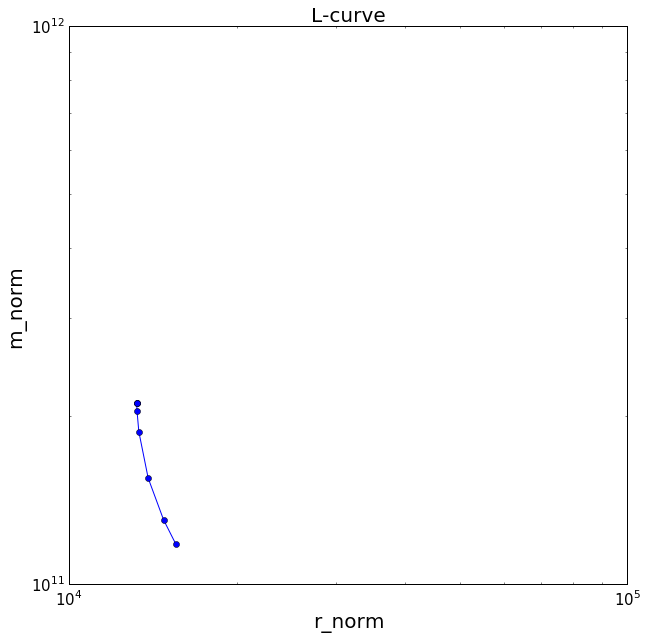

In [21]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [22]:
result_mclaros['magnetic_moment'] = m_est
result_mclaros['inc_est'] = incl_est
result_mclaros['dec_est'] = decl_est
result_mclaros['layer_depth'] = h
result_mclaros['reg_parameter'] = mu_list
result_mclaros['phi'] = phi_list

### Generating .pickle file

In [23]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_mclaros['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [24]:
file_name = 'data/result_mclaros.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_mclaros, f)
    
saved_files.append(file_name)

### Saved files

In [25]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/Lcurve_RM.png
2  figs/Lcurve_RM.eps
3  data/result_mclaros.pickle
